In [1]:
# !pip install -U scikit-learn

In [1]:
import sklearn
sklearn.__version__

'0.23.1'

In [2]:
# Importing data
from sklearn.datasets import fetch_california_housing
train_df, target_df = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
import pandas as pd
import numpy as np

In [12]:
import tensorflow as tf
from matplotlib import pyplot as plt
# tf.__version__

In [13]:
null_value_check = pd.DataFrame(train_df.isnull().sum())
null_value_check['# of null values'] = null_value_check[0]
null_value_check[['# of null values']]

,# of null values
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [14]:
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
target_df.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

In [18]:
# rmsprop:Divide the gradient by a running average 
# of its recent magnitude

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.14),
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## First 10 epochs

In [12]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 3ms/step - loss: 1.7985 - root_mean_squared_error: 1.3411
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 1.6260 - root_mean_squared_error: 1.2752
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 1.4629 - root_mean_squared_error: 1.2095
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5022 - root_mean_squared_error: 1.2257
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5881 - root_mean_squared_error: 1.2602
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 1.4615 - root_mean_squared_error: 1.2089
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5566 - root_mean_squared_error: 1.2476
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5925 - root_mean_squared_error: 1.2619A: 0s - loss: 1.5986 - root_mean_squared_error: 1.264
Epoch 9/10
21/21 [=========================

In [13]:
trained_weight, training_bias = model.get_weights()

In [14]:
trained_weight, training_bias

(array([[-0.01519316]], dtype=float32), array([1.6806802], dtype=float32))

In [15]:
trained_weight, training_bias

(array([[-0.01519316]], dtype=float32), array([1.6806802], dtype=float32))

In [16]:
model.history.history

{'loss': [1.798525333404541,
  1.6260467767715454,
  1.4628686904907227,
  1.5022426843643188,
  1.588118076324463,
  1.4615328311920166,
  1.556580662727356,
  1.5925028324127197,
  1.5152407884597778,
  1.5679309368133545],
 'root_mean_squared_error': [1.3410911560058594,
  1.2751654386520386,
  1.2094911336898804,
  1.2256600856781006,
  1.260205626487732,
  1.208938717842102,
  1.247630000114441,
  1.261944055557251,
  1.230951189994812,
  1.252170443534851]}

In [17]:
list_model_rmse = model.history.history["root_mean_squared_error"]
list_model_rmse

[1.3410911560058594,
 1.2751654386520386,
 1.2094911336898804,
 1.2256600856781006,
 1.260205626487732,
 1.208938717842102,
 1.247630000114441,
 1.261944055557251,
 1.230951189994812,
 1.252170443534851]

In [18]:
model.history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
list_epoch = model.history.epoch

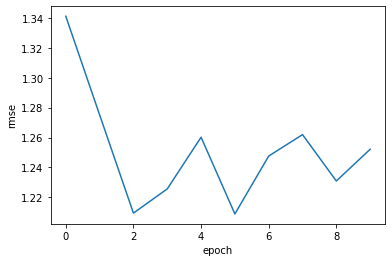

In [20]:
plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

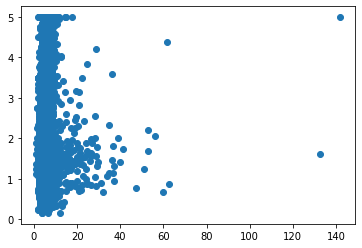

In [21]:
plt.scatter(train_df["AveRooms"], target_df)

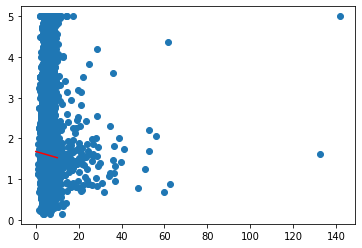

In [22]:
x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 10 epochs with Validation split

Epoch 1/20
15/15 [==============================] - 0s 30ms/step - loss: 1.5185 - root_mean_squared_error: 1.2323 - val_loss: 1.3971 - val_root_mean_squared_error: 1.1820
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.3245 - root_mean_squared_error: 1.1509 - val_loss: 1.9927 - val_root_mean_squared_error: 1.4116
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.4639 - root_mean_squared_error: 1.2099 - val_loss: 1.3888 - val_root_mean_squared_error: 1.1785
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 1.5238 - root_mean_squared_error: 1.2344 - val_loss: 1.5185 - val_root_mean_squared_error: 1.2323
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 1.5170 - root_mean_squared_error: 1.2317 - val_loss: 1.4178 - val_root_mean_squared_error: 1.1907
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 1.5282 - root_mean_squared_error: 1.2362 - val_loss: 1.5249 - val_root_mean_s

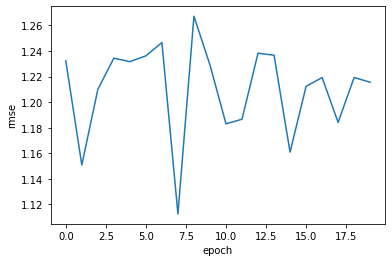

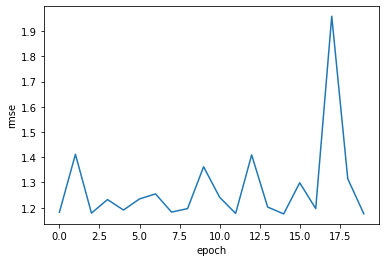

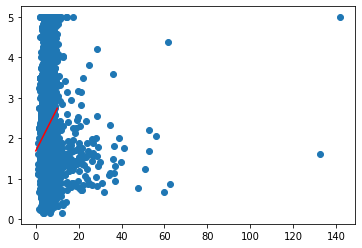

In [23]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=20, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 20 epochs without validation split

Epoch 1/20
21/21 [==============================] - 0s 3ms/step - loss: 1.5267 - root_mean_squared_error: 1.2356
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 1.4911 - root_mean_squared_error: 1.2211
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 1.5847 - root_mean_squared_error: 1.2588
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 1.4379 - root_mean_squared_error: 1.1991
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 1.5766 - root_mean_squared_error: 1.2556
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 1.4650 - root_mean_squared_error: 1.2104
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 1.5384 - root_mean_squared_error: 1.2403
Epoch 8/20
21/21 [==============================] - 0s 3ms/step - loss: 1.5645 - root_mean_squared_error: 1.2508
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 1.4776 - root_mean_squar

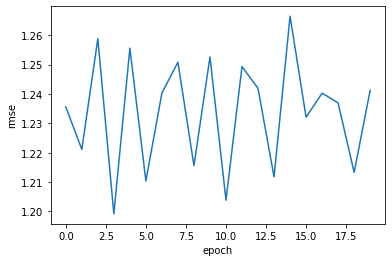

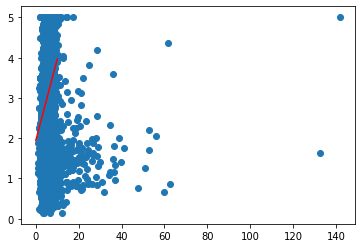

In [24]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=20)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_loss = model.history.history["loss"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse)
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 20 epochs with validation split

Epoch 1/20
15/15 [==============================] - 0s 8ms/step - loss: 1.4734 - root_mean_squared_error: 1.2138 - val_loss: 1.3866 - val_root_mean_squared_error: 1.1775
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.5357 - root_mean_squared_error: 1.2392 - val_loss: 1.6630 - val_root_mean_squared_error: 1.2896
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.4419 - root_mean_squared_error: 1.2008 - val_loss: 1.3822 - val_root_mean_squared_error: 1.1756
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.5215 - root_mean_squared_error: 1.2335 - val_loss: 2.2043 - val_root_mean_squared_error: 1.4847
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.4312 - root_mean_squared_error: 1.1963 - val_loss: 1.3992 - val_root_mean_squared_error: 1.1829
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.4149 - root_mean_squared_error: 1.1895 - val_loss: 1.4044 - val_root_mean_sq

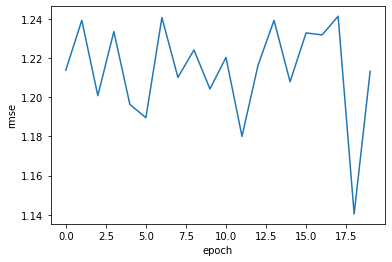

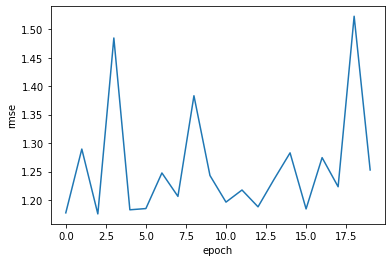

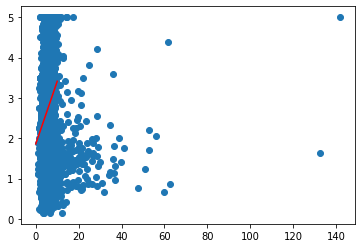

In [25]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=20, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 50 epochs without Validation Split

Epoch 1/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5435 - root_mean_squared_error: 1.2424
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 1.4900 - root_mean_squared_error: 1.2207
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5912 - root_mean_squared_error: 1.2614
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5116 - root_mean_squared_error: 1.2295
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5858 - root_mean_squared_error: 1.2593
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 1.4549 - root_mean_squared_error: 1.2062
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5995 - root_mean_squared_error: 1.2647
Epoch 8/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5057 - root_mean_squared_error: 1.2271
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5120 - root_mean_squar

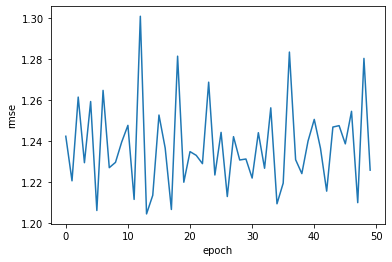

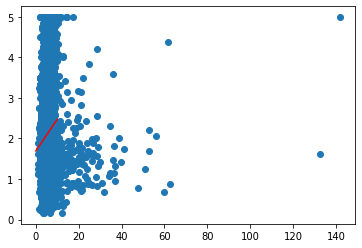

In [26]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=50)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))

list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse)
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 50 epochs with Validation Split

Epoch 1/50
15/15 [==============================] - 0s 8ms/step - loss: 1.5097 - root_mean_squared_error: 1.2287 - val_loss: 1.5363 - val_root_mean_squared_error: 1.2395
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4501 - root_mean_squared_error: 1.2042 - val_loss: 1.8746 - val_root_mean_squared_error: 1.3692
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4120 - root_mean_squared_error: 1.1883 - val_loss: 1.3964 - val_root_mean_squared_error: 1.1817
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4676 - root_mean_squared_error: 1.2114 - val_loss: 1.7021 - val_root_mean_squared_error: 1.3046
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4696 - root_mean_squared_error: 1.2123 - val_loss: 1.3834 - val_root_mean_squared_error: 1.1762
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4167 - root_mean_squared_error: 1.1902 - val_loss: 1.4357 - val_root_mean_sq

Epoch 49/50
15/15 [==============================] - 0s 8ms/step - loss: 1.5216 - root_mean_squared_error: 1.2335 - val_loss: 1.4364 - val_root_mean_squared_error: 1.1985
Epoch 50/50
15/15 [==============================] - 0s 8ms/step - loss: 1.4301 - root_mean_squared_error: 1.1959 - val_loss: 1.6041 - val_root_mean_squared_error: 1.2665
Model trained weight: [[0.04580165]] and bias: [1.5754442]


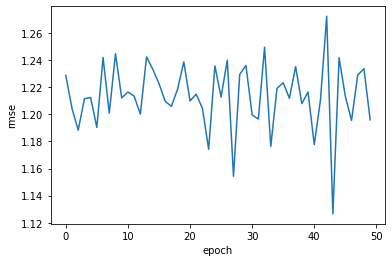

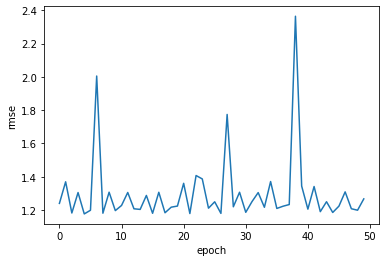

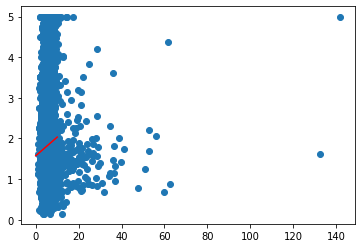

In [27]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=50, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 200 epochs without Validation

Epoch 1/200
21/21 [==============================] - 0s 3ms/step - loss: 1.4937 - root_mean_squared_error: 1.2222
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5792 - root_mean_squared_error: 1.2567
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5375 - root_mean_squared_error: 1.2400
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5022 - root_mean_squared_error: 1.2257
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5552 - root_mean_squared_error: 1.2471
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5652 - root_mean_squared_error: 1.2511
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5767 - root_mean_squared_error: 1.2557
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5236 - root_mean_squared_error: 1.2343
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5215 - root_m

Epoch 143/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5041 - root_mean_squared_error: 1.2264
Epoch 144/200
21/21 [==============================] - 0s 3ms/step - loss: 1.6092 - root_mean_squared_error: 1.2685
Epoch 145/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5245 - root_mean_squared_error: 1.2347
Epoch 146/200
21/21 [==============================] - 0s 3ms/step - loss: 1.6100 - root_mean_squared_error: 1.2689
Epoch 147/200
21/21 [==============================] - 0s 3ms/step - loss: 1.4413 - root_mean_squared_error: 1.2006
Epoch 148/200
21/21 [==============================] - 0s 3ms/step - loss: 1.4844 - root_mean_squared_error: 1.2184
Epoch 149/200
21/21 [==============================] - 0s 3ms/step - loss: 1.5845 - root_mean_squared_error: 1.2588
Epoch 150/200
21/21 [==============================] - 0s 3ms/step - loss: 1.4890 - root_mean_squared_error: 1.2202
Epoch 151/200
21/21 [==============================] - 0s 3ms/step - los

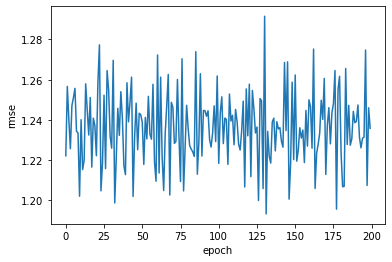

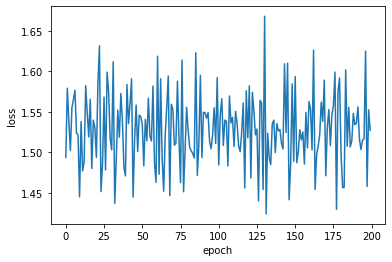

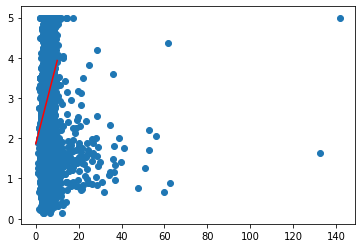

In [28]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=200)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_loss = model.history.history["loss"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse)
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_loss)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 200 Epochs with Validation Split

Epoch 1/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4651 - root_mean_squared_error: 1.2104 - val_loss: 1.8117 - val_root_mean_squared_error: 1.3460
Epoch 2/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4221 - root_mean_squared_error: 1.1925 - val_loss: 2.1028 - val_root_mean_squared_error: 1.4501
Epoch 3/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4323 - root_mean_squared_error: 1.1968 - val_loss: 1.5147 - val_root_mean_squared_error: 1.2307
Epoch 4/200
15/15 [==============================] - 0s 9ms/step - loss: 1.5414 - root_mean_squared_error: 1.2415 - val_loss: 1.4605 - val_root_mean_squared_error: 1.2085
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4860 - root_mean_squared_error: 1.2190 - val_loss: 1.5513 - val_root_mean_squared_error: 1.2455
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4949 - root_mean_squared_error: 1.2227 - val_loss: 1.5437 - val_root_m

Epoch 96/200
15/15 [==============================] - 0s 9ms/step - loss: 1.3494 - root_mean_squared_error: 1.1616 - val_loss: 1.4443 - val_root_mean_squared_error: 1.2018
Epoch 97/200
15/15 [==============================] - 0s 9ms/step - loss: 1.5136 - root_mean_squared_error: 1.2303 - val_loss: 1.7829 - val_root_mean_squared_error: 1.3353
Epoch 98/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4829 - root_mean_squared_error: 1.2177 - val_loss: 1.3997 - val_root_mean_squared_error: 1.1831
Epoch 99/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4300 - root_mean_squared_error: 1.1958 - val_loss: 1.7185 - val_root_mean_squared_error: 1.3109
Epoch 100/200
15/15 [==============================] - 0s 9ms/step - loss: 1.6221 - root_mean_squared_error: 1.2736 - val_loss: 1.4003 - val_root_mean_squared_error: 1.1833
Epoch 101/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4543 - root_mean_squared_error: 1.2059 - val_loss: 1.6548 - va

15/15 [==============================] - 0s 9ms/step - loss: 1.4491 - root_mean_squared_error: 1.2038 - val_loss: 1.5959 - val_root_mean_squared_error: 1.2633
Epoch 191/200
15/15 [==============================] - 0s 8ms/step - loss: 1.5206 - root_mean_squared_error: 1.2331 - val_loss: 1.4298 - val_root_mean_squared_error: 1.1957
Epoch 192/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4903 - root_mean_squared_error: 1.2208 - val_loss: 1.3938 - val_root_mean_squared_error: 1.1806
Epoch 193/200
15/15 [==============================] - 0s 9ms/step - loss: 1.4217 - root_mean_squared_error: 1.1923 - val_loss: 1.3813 - val_root_mean_squared_error: 1.1753
Epoch 194/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4762 - root_mean_squared_error: 1.2150 - val_loss: 1.4486 - val_root_mean_squared_error: 1.2036
Epoch 195/200
15/15 [==============================] - 0s 8ms/step - loss: 1.4739 - root_mean_squared_error: 1.2140 - val_loss: 1.6356 - val_root_mea

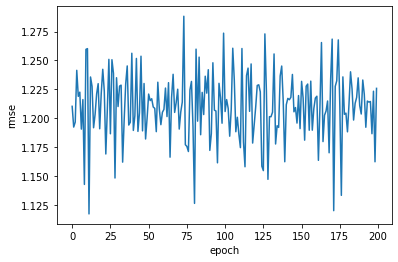

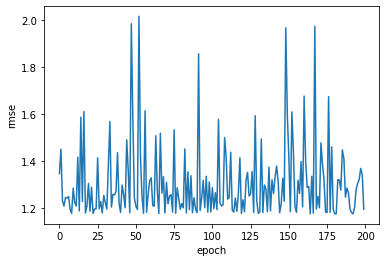

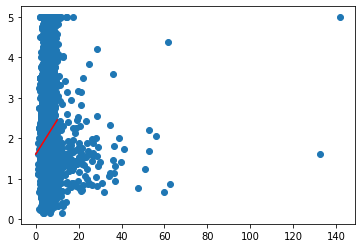

In [29]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=1000, epochs=200, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## 500 epochs with validation split

Epoch 1/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5556 - root_mean_squared_error: 1.2472 - val_loss: 1.3732 - val_root_mean_squared_error: 1.1718
Epoch 2/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4987 - root_mean_squared_error: 1.2242 - val_loss: 1.3752 - val_root_mean_squared_error: 1.1727
Epoch 3/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5114 - root_mean_squared_error: 1.2294 - val_loss: 1.4058 - val_root_mean_squared_error: 1.1856
Epoch 4/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5568 - root_mean_squared_error: 1.2477 - val_loss: 1.4130 - val_root_mean_squared_error: 1.1887
Epoch 5/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4760 - root_mean_squared_error: 1.2149 - val_loss: 1.4375 - val_root_mean_squared_error: 1.1990
Epoch 6/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5304 - root_mean_squared_error: 1.2371 - val_loss: 1.6262 

289/289 [==============================] - 1s 4ms/step - loss: 1.4768 - root_mean_squared_error: 1.2152 - val_loss: 1.3802 - val_root_mean_squared_error: 1.1748
Epoch 96/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4809 - root_mean_squared_error: 1.2169 - val_loss: 1.9559 - val_root_mean_squared_error: 1.3985
Epoch 97/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5316 - root_mean_squared_error: 1.2376 - val_loss: 1.4078 - val_root_mean_squared_error: 1.1865
Epoch 98/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5217 - root_mean_squared_error: 1.2336 - val_loss: 1.5369 - val_root_mean_squared_error: 1.2397
Epoch 99/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5284 - root_mean_squared_error: 1.2363 - val_loss: 1.5883 - val_root_mean_squared_error: 1.2603
Epoch 100/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4876 - root_mean_squared_error: 1.2197 - val_loss: 1.3819 - val_

Epoch 142/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4968 - root_mean_squared_error: 1.2234 - val_loss: 1.8542 - val_root_mean_squared_error: 1.3617
Epoch 143/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5424 - root_mean_squared_error: 1.2419 - val_loss: 1.4685 - val_root_mean_squared_error: 1.2118
Epoch 144/500
289/289 [==============================] - 1s 4ms/step - loss: 1.6124 - root_mean_squared_error: 1.2698 - val_loss: 1.5876 - val_root_mean_squared_error: 1.2600
Epoch 145/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4781 - root_mean_squared_error: 1.2158 - val_loss: 1.4759 - val_root_mean_squared_error: 1.2149
Epoch 146/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5083 - root_mean_squared_error: 1.2281 - val_loss: 1.6441 - val_root_mean_squared_error: 1.2822
Epoch 147/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4966 - root_mean_squared_error: 1.2234 - val_l

Epoch 189/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4961 - root_mean_squared_error: 1.2231 - val_loss: 1.4300 - val_root_mean_squared_error: 1.1958
Epoch 190/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4828 - root_mean_squared_error: 1.2177 - val_loss: 1.9087 - val_root_mean_squared_error: 1.3816
Epoch 191/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5056 - root_mean_squared_error: 1.2270 - val_loss: 2.2790 - val_root_mean_squared_error: 1.5096
Epoch 192/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5179 - root_mean_squared_error: 1.2320 - val_loss: 1.4235 - val_root_mean_squared_error: 1.1931
Epoch 193/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5154 - root_mean_squared_error: 1.2310 - val_loss: 1.5024 - val_root_mean_squared_error: 1.2257
Epoch 194/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5157 - root_mean_squared_error: 1.2311 - val_l

Epoch 236/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4982 - root_mean_squared_error: 1.2240 - val_loss: 1.4743 - val_root_mean_squared_error: 1.2142
Epoch 237/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5219 - root_mean_squared_error: 1.2337 - val_loss: 1.4519 - val_root_mean_squared_error: 1.2049
Epoch 238/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5753 - root_mean_squared_error: 1.2551 - val_loss: 1.4504 - val_root_mean_squared_error: 1.2043
Epoch 239/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4857 - root_mean_squared_error: 1.2189 - val_loss: 1.5851 - val_root_mean_squared_error: 1.2590
Epoch 240/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5404 - root_mean_squared_error: 1.2411 - val_loss: 1.6239 - val_root_mean_squared_error: 1.2743
Epoch 241/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4950 - root_mean_squared_error: 1.2227 - val_l

Epoch 283/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5153 - root_mean_squared_error: 1.2310 - val_loss: 1.3730 - val_root_mean_squared_error: 1.1718
Epoch 284/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4954 - root_mean_squared_error: 1.2229 - val_loss: 1.7812 - val_root_mean_squared_error: 1.3346
Epoch 285/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5364 - root_mean_squared_error: 1.2395 - val_loss: 1.4024 - val_root_mean_squared_error: 1.1842
Epoch 286/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4956 - root_mean_squared_error: 1.2229 - val_loss: 1.5334 - val_root_mean_squared_error: 1.2383
Epoch 287/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5203 - root_mean_squared_error: 1.2330 - val_loss: 2.7871 - val_root_mean_squared_error: 1.6695
Epoch 288/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5048 - root_mean_squared_error: 1.2267 - val_l

Epoch 330/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5591 - root_mean_squared_error: 1.2486 - val_loss: 1.3920 - val_root_mean_squared_error: 1.1798
Epoch 331/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5348 - root_mean_squared_error: 1.2389 - val_loss: 1.3878 - val_root_mean_squared_error: 1.1781
Epoch 332/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5693 - root_mean_squared_error: 1.2527 - val_loss: 1.8654 - val_root_mean_squared_error: 1.3658
Epoch 333/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5693 - root_mean_squared_error: 1.2527 - val_loss: 1.9238 - val_root_mean_squared_error: 1.3870
Epoch 334/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4880 - root_mean_squared_error: 1.2198 - val_loss: 1.5304 - val_root_mean_squared_error: 1.2371
Epoch 335/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5195 - root_mean_squared_error: 1.2327 - val_l

Epoch 377/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5396 - root_mean_squared_error: 1.2408 - val_loss: 1.4314 - val_root_mean_squared_error: 1.1964
Epoch 378/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5437 - root_mean_squared_error: 1.2425 - val_loss: 1.5936 - val_root_mean_squared_error: 1.2624
Epoch 379/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5423 - root_mean_squared_error: 1.2419 - val_loss: 1.5299 - val_root_mean_squared_error: 1.2369
Epoch 380/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4740 - root_mean_squared_error: 1.2141 - val_loss: 1.5405 - val_root_mean_squared_error: 1.2412
Epoch 381/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5071 - root_mean_squared_error: 1.2276 - val_loss: 1.4617 - val_root_mean_squared_error: 1.2090
Epoch 382/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4861 - root_mean_squared_error: 1.2190 - val_l

Epoch 424/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5497 - root_mean_squared_error: 1.2449 - val_loss: 1.5915 - val_root_mean_squared_error: 1.2616
Epoch 425/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5236 - root_mean_squared_error: 1.2344 - val_loss: 1.6328 - val_root_mean_squared_error: 1.2778
Epoch 426/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5115 - root_mean_squared_error: 1.2294 - val_loss: 1.4240 - val_root_mean_squared_error: 1.1933
Epoch 427/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4961 - root_mean_squared_error: 1.2231 - val_loss: 1.6093 - val_root_mean_squared_error: 1.2686
Epoch 428/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4831 - root_mean_squared_error: 1.2178 - val_loss: 1.5080 - val_root_mean_squared_error: 1.2280
Epoch 429/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5224 - root_mean_squared_error: 1.2338 - val_l

Epoch 471/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4955 - root_mean_squared_error: 1.2229 - val_loss: 1.4874 - val_root_mean_squared_error: 1.2196
Epoch 472/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5186 - root_mean_squared_error: 1.2323 - val_loss: 1.4011 - val_root_mean_squared_error: 1.1837
Epoch 473/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5134 - root_mean_squared_error: 1.2302 - val_loss: 1.5451 - val_root_mean_squared_error: 1.2430
Epoch 474/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5230 - root_mean_squared_error: 1.2341 - val_loss: 1.4215 - val_root_mean_squared_error: 1.1923
Epoch 475/500
289/289 [==============================] - 1s 4ms/step - loss: 1.5084 - root_mean_squared_error: 1.2282 - val_loss: 1.4365 - val_root_mean_squared_error: 1.1985
Epoch 476/500
289/289 [==============================] - 1s 4ms/step - loss: 1.4693 - root_mean_squared_error: 1.2121 - val_l

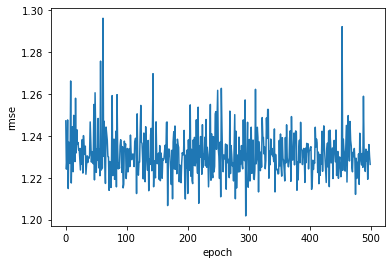

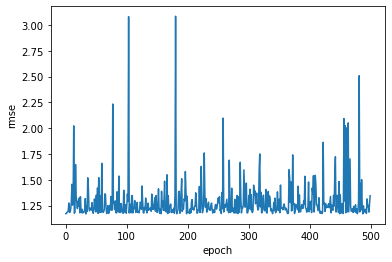

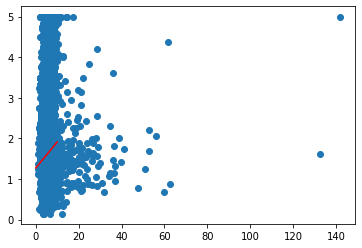

In [30]:
model.fit(x=train_df['AveRooms'], y=target_df, batch_size=50, epochs=500, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveRooms"], target_df)

## Predictions using the 200 model

In [31]:
test_df = train_df["AveRooms"][100:120]
test_df

100    3.724800
101    3.878424
102    3.745614
103    3.515498
104    3.281722
105    6.184426
106    4.442982
107    4.165877
108    4.848189
109    4.160848
110    5.628458
111    3.727006
112    3.253081
113    4.578035
114    3.822275
115    4.395189
116    3.023480
117    4.040501
118    6.742627
119    6.546392
Name: AveRooms, dtype: float64

In [32]:
predictions = model.predict_on_batch(x=test_df)
predictions

array([[1.5116827],
       [1.5215209],
       [1.5130156],
       [1.4982789],
       [1.4833078],
       [1.669198 ],
       [1.5576754],
       [1.5399294],
       [1.583625 ],
       [1.5396074],
       [1.6335937],
       [1.511824 ],
       [1.4814737],
       [1.5663242],
       [1.517925 ],
       [1.5546147],
       [1.4667699],
       [1.5319004],
       [1.7049454],
       [1.6923785]], dtype=float32)

In [33]:
pd.concat([test_df.reset_index(), pd.Series(list(predictions))], axis=1, ignore_index=True)

,0,1,2
0,100,3.724800,[1.5116827]
1,101,3.878424,[1.5215209]
2,102,3.745614,[1.5130156]
3,103,3.515498,[1.4982789]
4,104,3.281722,[1.4833078]
5,105,6.184426,[1.669198]
6,106,4.442982,[1.5576754]
7,107,4.165877,[1.5399294]
8,108,4.848189,[1.583625]
9,109,4.160848,[1.5396074]


## Conclusion

Not such a good model.

## Try new column

In [34]:
train_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

MedInc


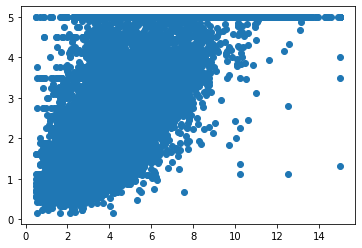

HouseAge


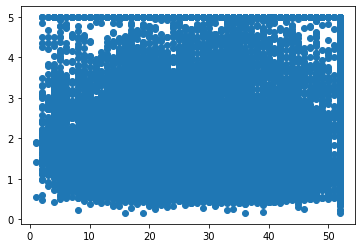

AveRooms


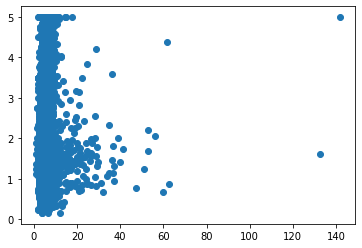

AveBedrms


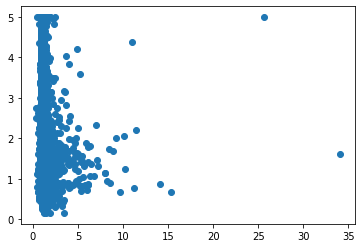

Population


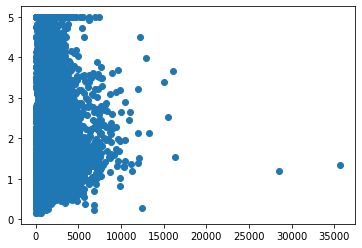

AveOccup


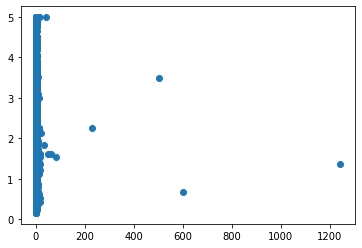

Latitude


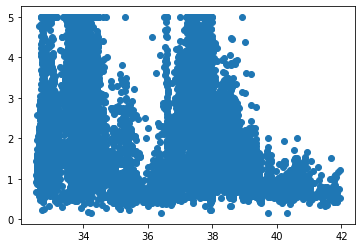

Longitude


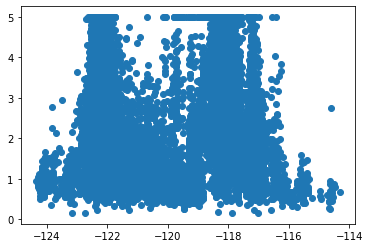

In [35]:
for each_col in train_df.columns:
    print(each_col)
    plt.scatter(train_df[each_col], target_df)
    plt.show()

Epoch 1/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3679 - root_mean_squared_error: 1.1696
Epoch 2/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3631 - root_mean_squared_error: 1.1675
Epoch 3/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3718 - root_mean_squared_error: 1.1712
Epoch 4/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3662 - root_mean_squared_error: 1.1689
Epoch 5/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3691 - root_mean_squared_error: 1.1701
Epoch 6/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3692 - root_mean_squared_error: 1.1701
Epoch 7/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3670 - root_mean_squared_error: 1.1692
Epoch 8/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3664 - root_mean_squared_error: 1.1689
Epoch 9/200
413/413 [==============================] - 1s 3ms/step - los

413/413 [==============================] - 1s 2ms/step - loss: 1.3750 - root_mean_squared_error: 1.1726
Epoch 72/200
413/413 [==============================] - 1s 2ms/step - loss: 1.3644 - root_mean_squared_error: 1.1681
Epoch 73/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3671 - root_mean_squared_error: 1.1692
Epoch 74/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3712 - root_mean_squared_error: 1.1710
Epoch 75/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3642 - root_mean_squared_error: 1.1680
Epoch 76/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3718 - root_mean_squared_error: 1.1712
Epoch 77/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3755 - root_mean_squared_error: 1.1728
Epoch 78/200
413/413 [==============================] - 1s 3ms/step - loss: 1.3655 - root_mean_squared_error: 1.1685
Epoch 79/200
413/413 [==============================] - 1s 3ms/step - loss: 1

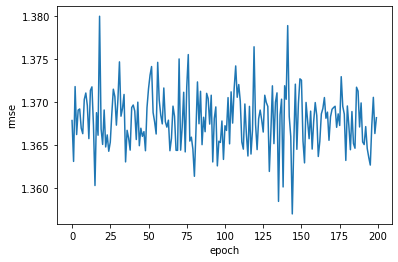

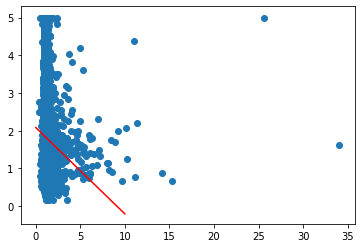

In [36]:
model.fit(x=train_df['AveBedrms'], y=target_df, batch_size=50, epochs=200, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["AveBedrms"], target_df)

In [37]:
test_df = train_df["AveBedrms"][100:120]
predictions = model.predict_on_batch(x=test_df)
pd.concat([test_df.reset_index(), pd.Series(list(predictions))], axis=1, ignore_index=True)

,0,1,2
0,100,1.131200,[1.8239895]
1,101,1.070808,[1.8378158]
2,102,1.061404,[1.8399689]
3,103,1.143556,[1.8211606]
4,104,1.069871,[1.8380303]
5,105,0.922131,[1.8718545]
6,106,1.057018,[1.8409731]
7,107,1.090047,[1.8334111]
8,108,1.045961,[1.8435044]
9,109,1.066085,[1.8388972]


## Looks better than the other models

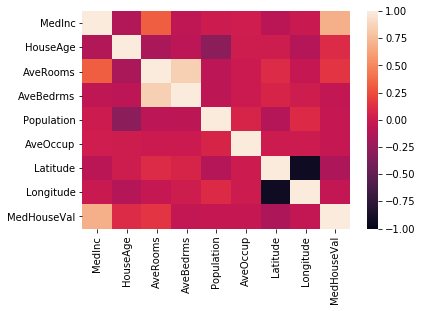

In [38]:
import seaborn as sns
sns.heatmap(pd.concat([train_df, target_df], axis = 1).corr(), vmin=-1, vmax=1)

Epoch 1/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8602 - root_mean_squared_error: 0.9275
Epoch 2/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8398 - root_mean_squared_error: 0.9164
Epoch 3/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8464 - root_mean_squared_error: 0.9200A: 0s - loss: 0.8133 - root_mean_squ
Epoch 4/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8453 - root_mean_squared_error: 0.9194
Epoch 5/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8391 - root_mean_squared_error: 0.9160
Epoch 6/200
413/413 [==============================] - 1s 2ms/step - loss: 0.8356 - root_mean_squared_error: 0.9141
Epoch 7/200
413/413 [==============================] - 1s 2ms/step - loss: 0.8429 - root_mean_squared_error: 0.9181
Epoch 8/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8431 - root_mean_squared_error: 0.9182
Epoch 9/200
413/413 [===============

413/413 [==============================] - 1s 3ms/step - loss: 0.8423 - root_mean_squared_error: 0.9178
Epoch 140/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8402 - root_mean_squared_error: 0.9166
Epoch 141/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8381 - root_mean_squared_error: 0.9155
Epoch 142/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8386 - root_mean_squared_error: 0.9157
Epoch 143/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8433 - root_mean_squared_error: 0.9183
Epoch 144/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8423 - root_mean_squared_error: 0.9178
Epoch 145/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8432 - root_mean_squared_error: 0.9183
Epoch 146/200
413/413 [==============================] - 1s 3ms/step - loss: 0.8460 - root_mean_squared_error: 0.9198
Epoch 147/200
413/413 [==============================] - 1s 3ms/step -

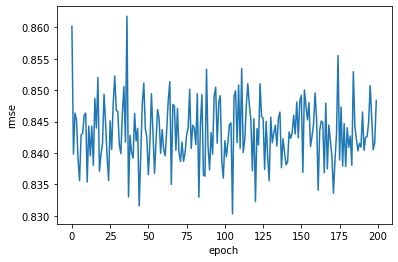

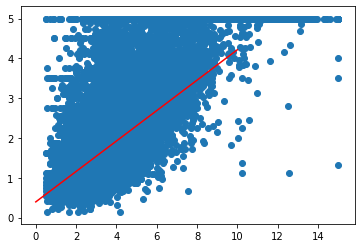

In [39]:
model.fit(x=train_df['MedInc'], y=target_df, batch_size=50, epochs=200, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["MedInc"], target_df)

In [40]:
test_df = train_df["MedInc"][100:120]
predictions = model.predict_on_batch(x=test_df)
pd.concat([test_df.reset_index(), pd.Series(list(predictions))], axis=1, ignore_index=True)

,0,1,2
0,100,2.4912,[1.346842]
1,101,3.2177,[1.6245522]
2,102,3.1250,[1.5891169]
3,103,2.5795,[1.3805953]
4,104,2.8406,[1.4804028]
5,105,4.9306,[2.2793212]
6,106,3.2727,[1.6455764]
7,107,3.1691,[1.6059746]
8,108,3.9000,[1.8853666]
9,109,3.9063,[1.8877748]


## Loss Hasn't Converged

So adding 1000 epochs.

Epoch 1/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7837 - root_mean_squared_error: 0.8853 - val_loss: 0.9133 - val_root_mean_squared_error: 0.9557
Epoch 2/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7901 - root_mean_squared_error: 0.8889 - val_loss: 0.8101 - val_root_mean_squared_error: 0.9000
Epoch 3/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7890 - root_mean_squared_error: 0.8882 - val_loss: 0.8078 - val_root_mean_squared_error: 0.8988
Epoch 4/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7843 - root_mean_squared_error: 0.8856 - val_loss: 1.0313 - val_root_mean_squared_error: 1.0155
Epoch 5/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7839 - root_mean_squared_error: 0.8854 - val_loss: 0.8746 - val_root_mean_squared_error: 0.9352
Epoch 6/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7911 - root_mean_squared_error: 0.8895 - val_loss: 1

Epoch 48/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7804 - root_mean_squared_error: 0.8834 - val_loss: 0.9916 - val_root_mean_squared_error: 0.9958
Epoch 49/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7790 - root_mean_squared_error: 0.8826 - val_loss: 0.9618 - val_root_mean_squared_error: 0.9807
Epoch 50/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7953 - root_mean_squared_error: 0.8918 - val_loss: 0.9615 - val_root_mean_squared_error: 0.9806
Epoch 51/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7845 - root_mean_squared_error: 0.8857 - val_loss: 1.5792 - val_root_mean_squared_error: 1.2566
Epoch 52/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7890 - root_mean_squared_error: 0.8883 - val_loss: 0.8079 - val_root_mean_squared_error: 0.8988
Epoch 53/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7868 - root_mean_squared_error: 0.8870 - val_l

Epoch 95/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7794 - root_mean_squared_error: 0.8828 - val_loss: 0.8219 - val_root_mean_squared_error: 0.9066
Epoch 96/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7841 - root_mean_squared_error: 0.8855 - val_loss: 1.1008 - val_root_mean_squared_error: 1.0492
Epoch 97/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7852 - root_mean_squared_error: 0.8861 - val_loss: 0.8231 - val_root_mean_squared_error: 0.9072
Epoch 98/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7852 - root_mean_squared_error: 0.8861 - val_loss: 0.8239 - val_root_mean_squared_error: 0.9077
Epoch 99/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7872 - root_mean_squared_error: 0.8873 - val_loss: 0.8252 - val_root_mean_squared_error: 0.9084
Epoch 100/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7899 - root_mean_squared_error: 0.8888 - val_

289/289 [==============================] - 1s 4ms/step - loss: 0.7777 - root_mean_squared_error: 0.8819 - val_loss: 1.0979 - val_root_mean_squared_error: 1.0478
Epoch 188/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7753 - root_mean_squared_error: 0.8805 - val_loss: 0.8317 - val_root_mean_squared_error: 0.9120
Epoch 189/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7849 - root_mean_squared_error: 0.8859 - val_loss: 1.5447 - val_root_mean_squared_error: 1.2429
Epoch 190/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7818 - root_mean_squared_error: 0.8842 - val_loss: 0.9191 - val_root_mean_squared_error: 0.9587
Epoch 191/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7846 - root_mean_squared_error: 0.8858 - val_loss: 0.8679 - val_root_mean_squared_error: 0.9316
Epoch 192/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7798 - root_mean_squared_error: 0.8831 - val_loss: 0.91

289/289 [==============================] - 1s 4ms/step - loss: 0.7851 - root_mean_squared_error: 0.8860 - val_loss: 1.3059 - val_root_mean_squared_error: 1.1428
Epoch 280/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7888 - root_mean_squared_error: 0.8881 - val_loss: 1.0712 - val_root_mean_squared_error: 1.0350
Epoch 281/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7761 - root_mean_squared_error: 0.8810 - val_loss: 0.9024 - val_root_mean_squared_error: 0.9500
Epoch 282/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7842 - root_mean_squared_error: 0.8856 - val_loss: 0.9308 - val_root_mean_squared_error: 0.9648
Epoch 283/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7765 - root_mean_squared_error: 0.8812 - val_loss: 0.8481 - val_root_mean_squared_error: 0.9209
Epoch 284/1000
289/289 [==============================] - 1s 4ms/step - loss: 0.7952 - root_mean_squared_error: 0.8917 - val_loss: 0.83

289/289 [==============================] - 0s 1ms/step - loss: 0.7907 - root_mean_squared_error: 0.8892 - val_loss: 1.0904 - val_root_mean_squared_error: 1.0442
Epoch 372/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7863 - root_mean_squared_error: 0.8867 - val_loss: 1.0499 - val_root_mean_squared_error: 1.0246
Epoch 373/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7736 - root_mean_squared_error: 0.8795 - val_loss: 0.8137 - val_root_mean_squared_error: 0.9021
Epoch 374/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7922 - root_mean_squared_error: 0.8901 - val_loss: 3.3039 - val_root_mean_squared_error: 1.8177
Epoch 375/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7952 - root_mean_squared_error: 0.8917 - val_loss: 0.8301 - val_root_mean_squared_error: 0.9111
Epoch 376/1000
289/289 [==============================] - 0s 1ms/step - loss: 0.7884 - root_mean_squared_error: 0.8879 - val_loss: 0.81

289/289 [==============================] - 0s 1ms/step - loss: 0.7873 - root_mean_squared_error: 0.8873 - val_loss: 0.8435 - val_root_mean_squared_error: 0.9184
Epoch 464/1000
289/289 [==============================] - 1s 3ms/step - loss: 0.7902 - root_mean_squared_error: 0.8889 - val_loss: 1.2265 - val_root_mean_squared_error: 1.1075
Epoch 465/1000
289/289 [==============================] - 1s 3ms/step - loss: 0.7868 - root_mean_squared_error: 0.8870 - val_loss: 0.8133 - val_root_mean_squared_error: 0.9018
Epoch 466/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7891 - root_mean_squared_error: 0.8883 - val_loss: 1.0310 - val_root_mean_squared_error: 1.0154
Epoch 467/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7878 - root_mean_squared_error: 0.8876 - val_loss: 0.8531 - val_root_mean_squared_error: 0.9236
Epoch 468/1000
289/289 [==============================] - 0s 993us/step - loss: 0.7781 - root_mean_squared_error: 0.8821 - val_loss: 0.

289/289 [==============================] - 1s 2ms/step - loss: 0.7879 - root_mean_squared_error: 0.8877 - val_loss: 0.9542 - val_root_mean_squared_error: 0.9768
Epoch 556/1000
289/289 [==============================] - 0s 1ms/step - loss: 0.7855 - root_mean_squared_error: 0.8863 - val_loss: 0.8405 - val_root_mean_squared_error: 0.9168
Epoch 557/1000
289/289 [==============================] - 0s 1ms/step - loss: 0.7851 - root_mean_squared_error: 0.8861 - val_loss: 0.8671 - val_root_mean_squared_error: 0.9312
Epoch 558/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7898 - root_mean_squared_error: 0.8887 - val_loss: 1.7181 - val_root_mean_squared_error: 1.3108
Epoch 559/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7891 - root_mean_squared_error: 0.8883 - val_loss: 0.8150 - val_root_mean_squared_error: 0.9028
Epoch 560/1000
289/289 [==============================] - 0s 2ms/step - loss: 0.7948 - root_mean_squared_error: 0.8915 - val_loss: 0.90

289/289 [==============================] - 1s 2ms/step - loss: 0.7792 - root_mean_squared_error: 0.8827 - val_loss: 0.8126 - val_root_mean_squared_error: 0.9015
Epoch 648/1000
289/289 [==============================] - 0s 1ms/step - loss: 0.7870 - root_mean_squared_error: 0.8871 - val_loss: 1.2804 - val_root_mean_squared_error: 1.1315
Epoch 649/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7876 - root_mean_squared_error: 0.8874 - val_loss: 0.8260 - val_root_mean_squared_error: 0.9089
Epoch 650/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7866 - root_mean_squared_error: 0.8869 - val_loss: 0.8124 - val_root_mean_squared_error: 0.9013
Epoch 651/1000
289/289 [==============================] - 1s 3ms/step - loss: 0.7801 - root_mean_squared_error: 0.8832 - val_loss: 0.9188 - val_root_mean_squared_error: 0.9585
Epoch 652/1000
289/289 [==============================] - 1s 3ms/step - loss: 0.7816 - root_mean_squared_error: 0.8841 - val_loss: 0.85

289/289 [==============================] - 1s 2ms/step - loss: 0.7830 - root_mean_squared_error: 0.8849 - val_loss: 1.2050 - val_root_mean_squared_error: 1.0977
Epoch 740/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7817 - root_mean_squared_error: 0.8841 - val_loss: 0.9508 - val_root_mean_squared_error: 0.9751
Epoch 741/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7944 - root_mean_squared_error: 0.8913 - val_loss: 0.8349 - val_root_mean_squared_error: 0.9137
Epoch 742/1000
289/289 [==============================] - 1s 3ms/step - loss: 0.7828 - root_mean_squared_error: 0.8847 - val_loss: 0.8422 - val_root_mean_squared_error: 0.9177
Epoch 743/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7890 - root_mean_squared_error: 0.8883 - val_loss: 0.8444 - val_root_mean_squared_error: 0.9189
Epoch 744/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7825 - root_mean_squared_error: 0.8846 - val_loss: 0.91

289/289 [==============================] - 1s 2ms/step - loss: 0.7882 - root_mean_squared_error: 0.8878 - val_loss: 0.9237 - val_root_mean_squared_error: 0.9611
Epoch 832/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7859 - root_mean_squared_error: 0.8865 - val_loss: 0.8176 - val_root_mean_squared_error: 0.9042
Epoch 833/1000
289/289 [==============================] - 0s 2ms/step - loss: 0.7799 - root_mean_squared_error: 0.8831 - val_loss: 0.9240 - val_root_mean_squared_error: 0.9613
Epoch 834/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7876 - root_mean_squared_error: 0.8875 - val_loss: 1.4720 - val_root_mean_squared_error: 1.2132
Epoch 835/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7990 - root_mean_squared_error: 0.8938 - val_loss: 0.8135 - val_root_mean_squared_error: 0.9020
Epoch 836/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7751 - root_mean_squared_error: 0.8804 - val_loss: 1.11

289/289 [==============================] - 1s 2ms/step - loss: 0.7839 - root_mean_squared_error: 0.8854 - val_loss: 1.5191 - val_root_mean_squared_error: 1.2325
Epoch 924/1000
289/289 [==============================] - 0s 2ms/step - loss: 0.7901 - root_mean_squared_error: 0.8889 - val_loss: 0.8830 - val_root_mean_squared_error: 0.9397
Epoch 925/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7787 - root_mean_squared_error: 0.8824 - val_loss: 0.8408 - val_root_mean_squared_error: 0.9170
Epoch 926/1000
289/289 [==============================] - 1s 2ms/step - loss: 0.7787 - root_mean_squared_error: 0.8825 - val_loss: 0.8805 - val_root_mean_squared_error: 0.9383
Epoch 927/1000
289/289 [==============================] - 0s 2ms/step - loss: 0.7811 - root_mean_squared_error: 0.8838 - val_loss: 0.8099 - val_root_mean_squared_error: 0.9000
Epoch 928/1000
289/289 [==============================] - 0s 1ms/step - loss: 0.7797 - root_mean_squared_error: 0.8830 - val_loss: 1.36

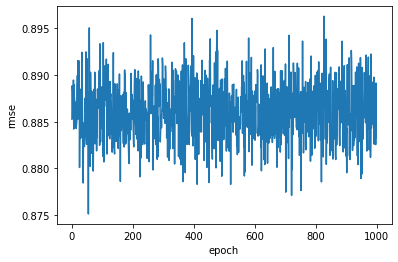

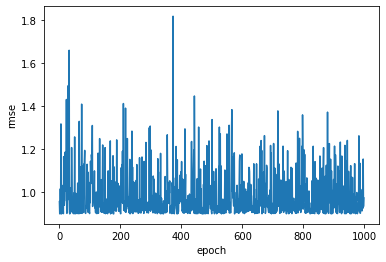

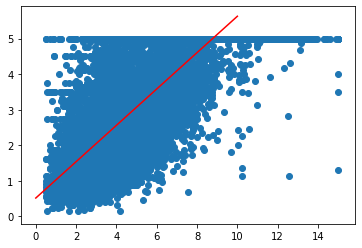

In [41]:
model.fit(x=train_df['MedInc'], y=target_df, batch_size=50, epochs=1000, validation_split=0.3)
trained_weight, training_bias = model.get_weights()
print("Model trained weight: {} and bias: {}".format(str(trained_weight), str(training_bias)))
list_model_val_rmse = model.history.history["val_root_mean_squared_error"]
list_model_rmse = model.history.history["root_mean_squared_error"]
list_epoch = model.history.epoch

plt.plot(list_epoch, list_model_rmse, label="Training Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

plt.plot(list_epoch, list_model_val_rmse, label="Validation Loss")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.show()

x0 = 0
y0 = training_bias
x1 = 10
y1 = training_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.scatter(train_df["MedInc"], target_df)

In [43]:
test_df = train_df["MedInc"][10000:10020]
predictions = model.predict_on_batch(x=test_df)
pd.concat([test_df.reset_index(), pd.Series(list(predictions))], axis=1, ignore_index=True)

,0,1,2
0,10000,4.2031,[2.665513]
1,10001,3.6087,[2.361914]
2,10002,4.5042,[2.8193042]
3,10003,3.9185,[2.520149]
4,10004,4.2802,[2.7048929]
5,10005,5.5161,[3.3361475]
6,10006,3.8417,[2.4809225]
7,10007,3.0804,[2.0920768]
8,10008,3.9000,[2.5107]
9,10009,5.0389,[3.0924103]


## Doesn't look too good.